In [11]:
import pandas as pd

In [12]:
df_train = pd.read_csv('../src/dTm_reg_train.csv')
df_test = pd.read_csv('../src/dTm_reg_test.csv')

df_train = df_train.drop(columns=['dChg', 'dVdwV'])
df_test = df_test.drop(columns=['dChg', 'dVdwV'])
df_test.head(5)

,SecStr,ASA_pct,dMW,dARM,dHydro,dSASA,totalE,dTmC
0,3,45.62,58,0.0,-0.473,96,1.119,-5.5
1,2,27.40,-76,-1.0,-0.384,-108,3.593,-15.8
2,1,0.07,2,0.0,-0.375,-15,1.251,-13.8
3,2,50.42,-60,0.0,-0.122,-93,1.573,-6.8
4,2,11.56,-76,-1.0,-0.384,-108,5.473,-14.7


In [13]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    y = df['dTmC']
    return X,y

In [14]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# Correlation

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

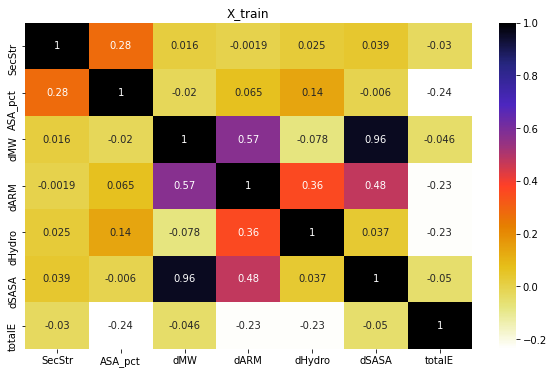

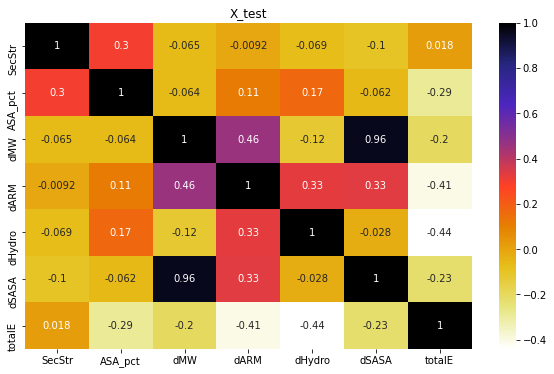

In [16]:
plt.figure(figsize=(10,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_train")
plt.show()

# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated


plt.figure(figsize=(10,6))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_test")
plt.show()


# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated

# SVM Regression

In [17]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

import numpy as np

model = []
cv_r2score = []
test_r2score = []

regr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.20865280605840839


0.29620694539714254


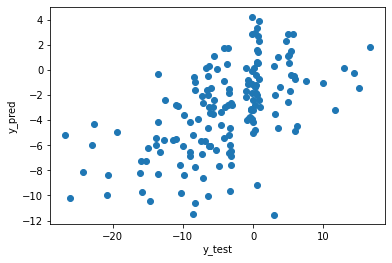

In [18]:
from sklearn.metrics import r2_score
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('SVM')

# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

regr = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=1))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.1671816230677341


0.23548688949803054


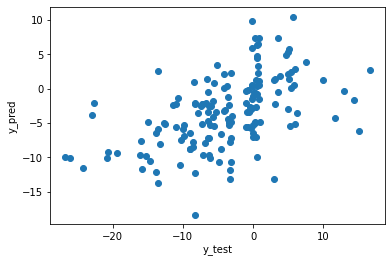

In [20]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('RF')

# KNN Regression

In [21]:
from sklearn.neighbors import KNeighborsRegressor

regr = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.2313878756503053


0.281076526957171


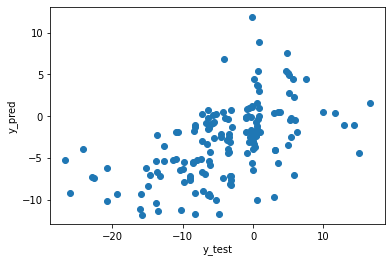

In [22]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('KNN')

# ANN Regression 

In [23]:
from sklearn.neural_network import MLPRegressor

regr = make_pipeline(StandardScaler(), MLPRegressor(max_iter=5000))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: St

0.07780132796550146


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.20705127562467684


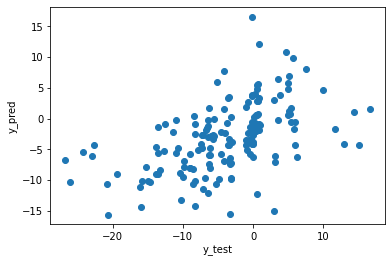

In [24]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('ANN')

# Overall

['SVM', 'RF', 'KNN', 'ANN']
[0.20865280605840839, 0.1671816230677341, 0.2313878756503053, 0.07780132796550146]


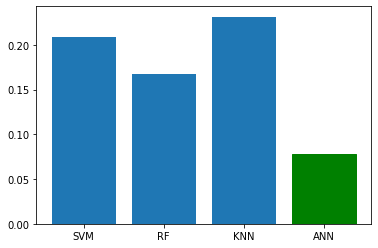

In [27]:
bar_list = plt.bar(model,cv_r2score)
bar_list[3].set_color('green')
print(model)
print(cv_r2score)

['SVM', 'RF', 'KNN', 'ANN']
[0.29620694539714254, 0.23548688949803054, 0.281076526957171, 0.20705127562467684]


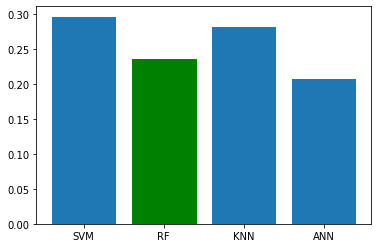

In [26]:
bar_list = plt.bar(model,test_r2score)
bar_list[1].set_color('green')
print(model)
print(test_r2score)